# 1.一阶导数和二阶导数微分形式

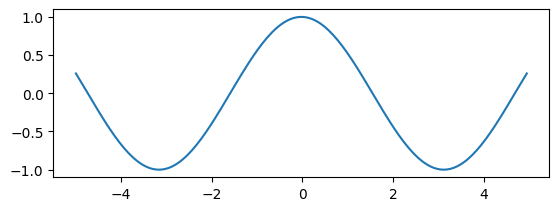

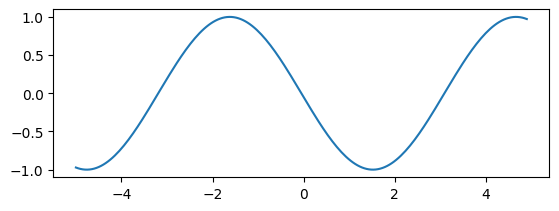

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 200)
y = np.sin(x)
# first derivatives
dy = y[1:200] - y[0:199]
dx = x[1] - x[0]
dy_dx = dy / dx
plt.subplot(2, 1, 1)
plt.plot(x[0:199], dy_dx)
plt.show()
# second derivatives
ddy_dx = ((dy[1:199] / dx) - (dy[0:198] / dx)) / dx
plt.subplot(2, 1, 2)
plt.plot(x[0:198], ddy_dx)
plt.show()

# 2.动量算符矩阵形式

In [3]:
N = 200
x_g = np.linspace(-5, 5, N)
dx = x_g[1] - x_g[0]
# kinetic operator matrix form
T = -(-2 * np.eye(N) + np.eye(N, k = 1).T + np.eye(N, k = 1)) / (2* dx** 2)

# 3.谐振子哈密顿量

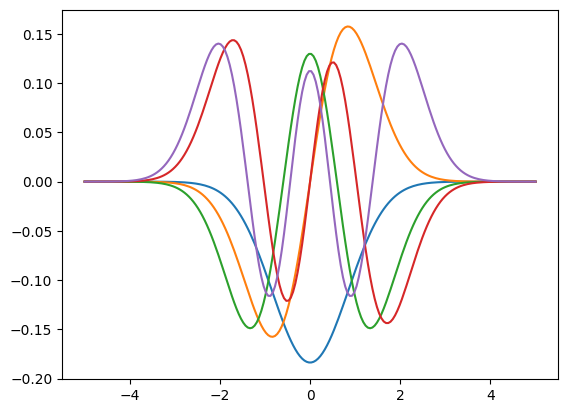

In [4]:
# potential term
V = np.diagflat(x_g * x_g)
H = T + V
# calculate the eigenvectors & eigenvalues
epsilon_n, psi_gn = np.linalg.eigh(H)

# plot 5 states with lowest energy
for i in range(5):
    plt.plot(x_g, psi_gn[:, i])

# 4.计算电子密度

In [5]:
# integrate
def integral(x_g, y):
    dx = x_g[1] - x_g[0]
    return np.sum(y * dx, axis = 0)

# nomalize psi
def normalizePsi(x, psi_gn):
    return psi_gn / np.sqrt(integral(x, psi_gn** 2))

print(integral(x_g, normalizePsi(x_g, psi_gn)** 2))
psi_gn = normalizePsi(x_g, psi_gn)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


6.0


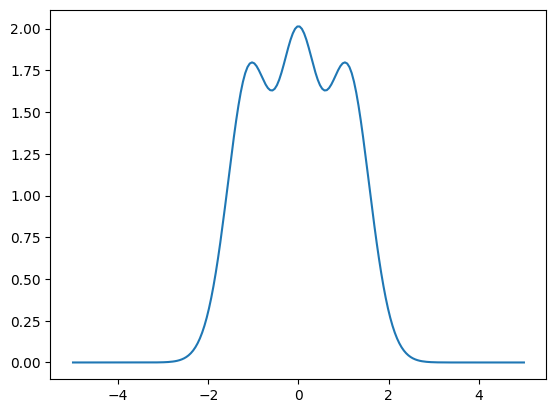

In [6]:
# 电子占据数
f_n = np.zeros(x.shape[0])
f_n[0:7] = [2, 2, 2, 0, 0, 0, 0]
# 计算电子密度
def electronDensity(x_g, psi_gn, f_n):

    density_g = np.zeros(x_g.shape[0])
    for i in range(N):
        density_g[i] = np.sum(np.multiply(f_n, psi_gn[i, :]** 2), axis = 0)
    return density_g
density_g = electronDensity(x_g, psi_gn, f_n)
plt.plot(x_g, density_g)
print(integral(x_g, density_g))


# 5. Exhange Energy

In [7]:
# 交换关联能和交换关联势
def calculateExchange(x_g, density_g):
    pi = 3.1415
    energy_g = - (3 / 4) * (pi / 3) * integral(x_g, density_g** (4 / 3))
    potential_g = - (pi / 3)** (1 / 3) * density_g ** (1 / 3)
    return energy_g, potential_g

mydensity = np.random.rand(10)
energy_g, potential_g = calculateExchange(range(10), mydensity)


# 6.Coulomb potential

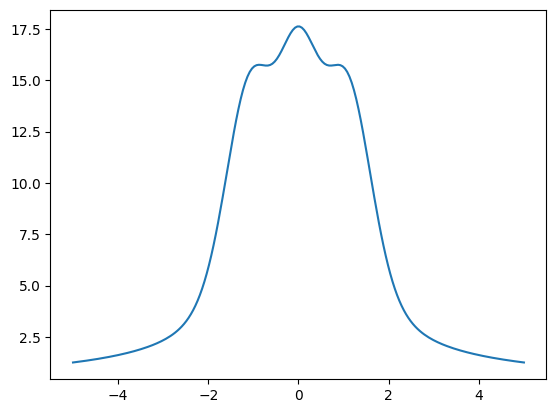

In [8]:

# 库仑相互作用能和势能，即Hatree项，电子相互作用项
def calculateCoulomb(x_g, density_g):
    epsilon = 0.001
    dx = x_g[1] - x_g[0]

    energy_g = 0.5 * np.sum(np.dot(density_g, density_g) * dx * dx / np.sqrt((np.subtract(x_g[None, ...], x_g[..., None]) ** 2 + epsilon)))

    potential_g = np.sum(density_g[None, ...] * dx / np.sqrt(np.subtract(x_g[None, ...], x_g[..., None]) ** 2 + epsilon), axis = -1)

    return energy_g, potential_g

energy_g, potential_g = calculateCoulomb(x_g, density_g)
plt.plot(x_g, potential_g)


# 7.自洽计算

Step:0	TotalEnergy:-113.8014613894993	TotalEnergyDifference:inf

Step:1	TotalEnergy:8707.26966452353	TotalEnergyDifference:8821.07112591303

Step:2	TotalEnergy:8707.26966452353	TotalEnergyDifference:0.0

Converged, Calculate finish


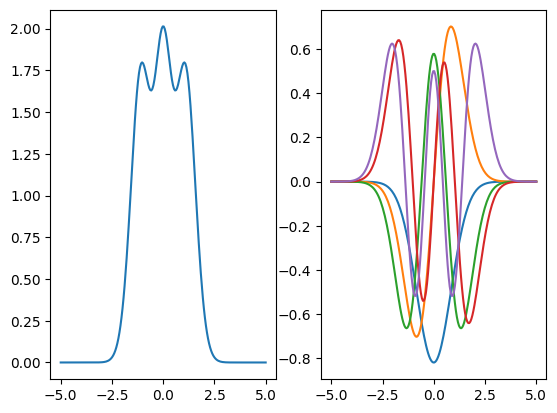

In [13]:
"""
:Description:进行自洽计算，返回计算的总能量，电子密度，波函数
:x_g:x网格
:density_g:初始电子密度
:T:动能算符矩阵形式
:V:外势能矩阵形式
:f_n:电子占据数
:epochs:最大迭代的步数
:energyConvergence:收敛判据,两步之间总能小于energyConvergence则判断已经收敛
"""
def selfConsistency(x_g, density_g, T, V, f_n, epochs = 10000, energyConergence = 1e-7):

    # 最多迭代epochs次
    for i in range(epochs):
        
        # 根据电子密度计算库仑项和交换关联项
        energyCoulomb_g, potentialCoulomb_g = calculateCoulomb(x_g, density_g)
        energyExchange_g, potentialExchange_g = calculateExchange(x_g, density_g)
        # 加和库仑项和交换关联项
        energy_g = energyCoulomb_g + energyExchange_g
        potential_g = potentialCoulomb_g + potentialExchange_g

        # 生成新的哈密顿矩阵
        totalV = V + np.diagflat(potential_g)
        H = T + V

        # 求哈密顿矩阵本征值,获得能量和波函数
        epsilon_n, psi_gn = np.linalg.eigh(H)

        # 波函数归一化
        psi_gn = normalizePsi(x_g, psi_gn)

        # 计算新的电子密度
        density_g = electronDensity(x_g, psi_gn, f_n)

        # 计算总能量
        totalEnergy = np.sum(f_n * epsilon_n) - np.sum(np.dot(totalV, density_g)) + energy_g
        if i == 0:
            totalEnergyDifference = np.inf
            lastTotalEnergy = totalEnergy
        else:
            totalEnergyDifference = totalEnergy - lastTotalEnergy
            lastTotalEnergy = totalEnergy

        print("Step:{}\tTotalEnergy:{}\tTotalEnergyDifference:{}\n".format(i, totalEnergy, totalEnergyDifference))

        # 判断是否收敛
        if abs(totalEnergyDifference) < energyConergence:
            print("Converged, Calculate finish")
            return energy_g, density_g, psi_gn
f_n = np.zeros(x_g.shape[0])
f_n[0:11] = [2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0]
# 动能算符矩阵形式
T = -(-2 * np.eye(N) + np.eye(N, k = 1).T + np.eye(N, k = 1)) / (2* dx** 2)
# 谐振子势能
V = np.diagflat(x_g * x_g)

outenergy_g, outdensity_g, outpsi_gn = selfConsistency(x_g, np.zeros(200), T, V, f_n, 1000, 1e-7)

plt.subplot(1, 2, 1)
plt.plot(x_g, outdensity_g)
plt.subplot(1, 2, 2)
for i in range(5):
    plt.plot(x_g, outpsi_gn[:, i])